In [1]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from matplotlib.dates import DateFormatter
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps
import matplotlib.gridspec as gridspec

In [2]:
sql = """
SELECT 
year, 
practice_id, 
indicator, 
denominator, 
exceptions

FROM `ebmdatalab.qof.achievement` 

WHERE indicator = 'MH010' #The % of pts on lithium with a record of lithium levels in the therapeutic range in the preceding 4 months

GROUP BY
year, 
practice_id,
indicator,
denominator,
exceptions

ORDER BY
year

"""

df_qof = bq.cached_read(sql, csv_path='df_qof.csv')

Downloading: 100%|██████████| 28888/28888 [00:11<00:00, 2517.66rows/s]


In [3]:
df_qof.head()

,year,practice_id,indicator,denominator,exceptions
0,1516,E82613,MH010,0,NaN
1,1516,J82199,MH010,0,NaN
2,1516,Y04942,MH010,0,NaN
3,1516,Y05167,MH010,0,NaN
4,1516,E82630,MH010,1,NaN


In [9]:
df_qof['totalpts'] = (df_qof['denominator'] + df_qof['exceptions'])
df_qof.tail()

,year,practice_id,indicator,denominator,exceptions,totalpts
28883,1819,J82155,MH010,39,7.0,46.0
28884,1819,H82034,MH010,17,8.0,25.0
28885,1819,G82021,MH010,4,9.0,13.0
28886,1819,N81029,MH010,14,9.0,23.0
28887,1819,M88004,MH010,23,10.0,33.0


In [10]:
df_qof.groupby('year').sum()

,denominator,exceptions,totalpts
year,,,
1516,43615,4568.0,48150.0
1617,42492,4343.0,46779.0
1718,41248,4228.0,45426.0
1819,40530,4138.0,44612.0


(20000, 50000)

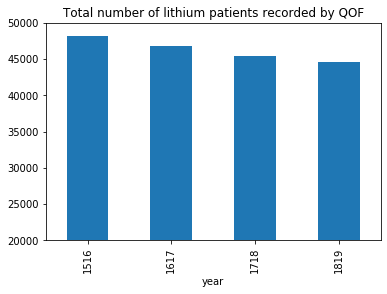

In [11]:
# Generate graph showing change in QOF patient numbers over time 
plot1 = df_qof.groupby("year")['totalpts'].sum().plot(kind='bar', title="Total number of lithium patients recorded by QOF")
plt.ylim(20000, 50000)